In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('OiDj_merged.csv')


df['IsBus'] = np.where(df['net_mode'] == 1, 1, 0)
df['IsRail'] = np.where(df['net_mode'] == 2, 1, 0)
df['IsRoad'] = np.where(df['net_mode'] == 0, 1, 0)
df['neti_Oi_netj_Dj'] = df['Oi_net_i'] * df['Dj_net_j']

print(df.head())

   Unnamed: 0  idx      Ck1Road       Ck1Bus      Ck1Rail      Ck2Road  \
0           0    0  7875351.359  3020828.439  9164254.201  7864111.513   
1           1    1  7875351.359  3020828.439  9164254.201  7865522.820   
2           2    2  7875351.359  3020828.439  9164254.201  7863413.383   
3           3    3  7875351.359  3020828.439  9164254.201  7864066.587   
4           4    4  7875351.359  3020828.439  9164254.201  7865096.332   

        Ck2Bus      Ck2Rail    CkDiffRoad    CkDiffBus  ...  zonei_netj  \
0  3018331.319  9177991.167 -11239.845770 -2497.120307  ...       702.0   
1  3018647.914  9176263.266  -9828.538792 -2180.525344  ...       703.0   
2  3018177.754  9178842.863 -11937.976120 -2650.685685  ...       704.0   
3  3018320.702  9178046.710 -11284.771780 -2507.736989  ...       705.0   
4  3018553.067  9176784.601 -10255.026640 -2275.372523  ...       706.0   

    lat_netj  lon_netj  osgb36_east_netj  osgb36_north_netj  area_netj  IsBus  \
0  51.539684  0.038467 

In [2]:
# extract subset
# mode = 0 - road; mode = 1 - Bus; mode = 2 - Rail
dafni_impacts_enriched_df = df[df['net_mode'] == 0]

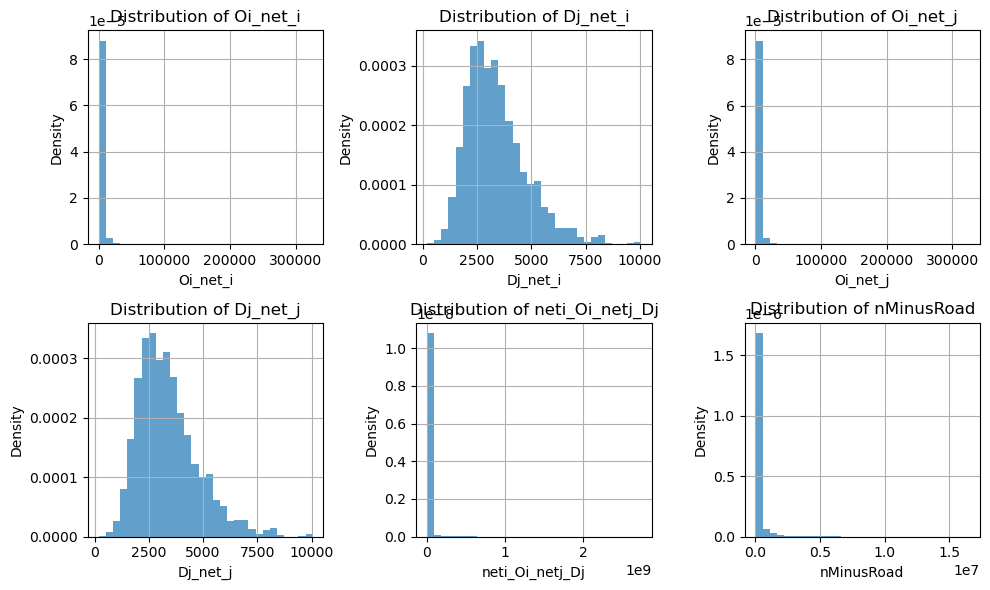

Skewness of the features:
Oi_net_i           19.381763
Dj_net_i            1.035441
Oi_net_j           19.382192
Dj_net_j            1.035072
neti_Oi_netj_Dj    22.486815
nMinusRoad         10.101040
dtype: float64


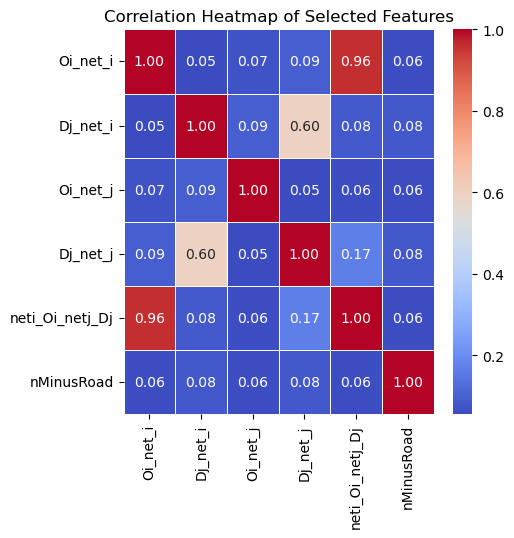

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


fig, axs = plt.subplots(2, 3, figsize=(10, 6))
axs = axs.flatten() 

# Plotting histograms for each feature
columns = ['Oi_net_i', 'Dj_net_i', 'Oi_net_j', 'Dj_net_j', 'neti_Oi_netj_Dj','nMinusRoad']
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    axs[i].hist(dafni_impacts_enriched_df[column], density=True, bins=30, alpha=0.7)
    axs[i].set_title(f'Distribution of {column}')
    axs[i].set_ylabel('Density')
    axs[i].set_xlabel(column)
    axs[i].grid(True)

# axs[-1].axis('off')

plt.tight_layout()
plt.show()

# Check the skewness
print("Skewness of the features:")
print(dafni_impacts_enriched_df[columns].skew())

# Heat map of correlation between features
selected_features = dafni_impacts_enriched_df[columns]
corr_matrix = selected_features.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()


In [4]:
# Calculate the occurrence count of each value
# value_counts = dafni_impacts_enriched_df['nMinusRoad'].value_counts()

# Determine the threshold of values to be reduced, this can be the median, mean or other criterion of occurrence counts
# threshold = value_counts.median()

# Find the values that occur more frequently than the threshold
# frequent_values = value_counts[value_counts > threshold].index

# Perform random sampling for each unusually frequent value
# for value in frequent_values:
    # Separate out each value's subset
    # value_df = dafni_impacts_enriched_df[dafni_impacts_enriched_df['nMinusRoad'] == value]
    
    # Decide the proportion of each value to keep
    # fraction_to_keep = 0.5  # For example, keep 10% of each value
    
    # Randomly sample the required proportion from the data
    # sampled_df = value_df.sample(frac=fraction_to_keep)
    
    # If it's the first value, initialize the final DataFrame
    # if 'final_df' not in locals():
        # final_df = sampled_df
    # else:
        # Merge the sampled data into the final DataFrame
        # final_df = pd.concat([final_df, sampled_df])
        
# Merge the sampled data of unusually frequent values with all other data
# dafni_impacts_enriched_df = pd.concat([final_df, dafni_impacts_enriched_df[~dafni_impacts_enriched_df['nMinusRoad'].isin(frequent_values)]]).sample(frac=1).reset_index(drop=True)


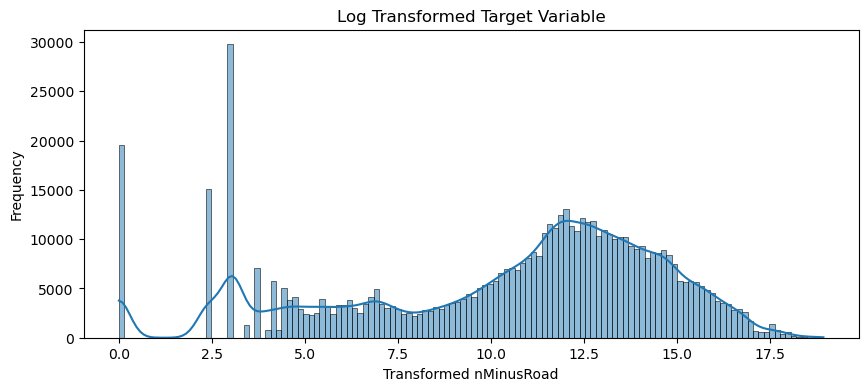

In [5]:
import numpy as np

scale_factor = 10  
scaled_data = dafni_impacts_enriched_df['nMinusRoad'] * scale_factor


transformed_data = np.log1p(scaled_data)

plt.figure(figsize=(10, 4))
sns.histplot(transformed_data, kde=True)
plt.title('Log Transformed Target Variable')
plt.xlabel('Transformed nMinusRoad')
plt.ylabel('Frequency')
plt.show()

C:\Users\Xinyi Liu\AppData\Local\Temp\ipykernel_33640\1520771109.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dafni_impacts_enriched_df['Oi_net_i_log'] = np.log1p(dafni_impacts_enriched_df['Oi_net_i'])
C:\Users\Xinyi Liu\AppData\Local\Temp\ipykernel_33640\1520771109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dafni_impacts_enriched_df['Oi_net_j_log'] = np.log1p(dafni_impacts_enriched_df['Oi_net_j'])
C:\Users\Xinyi Liu\AppData\Local\Temp\ipykernel_33640\1520771109.py:8: SettingWithCopyWarning:

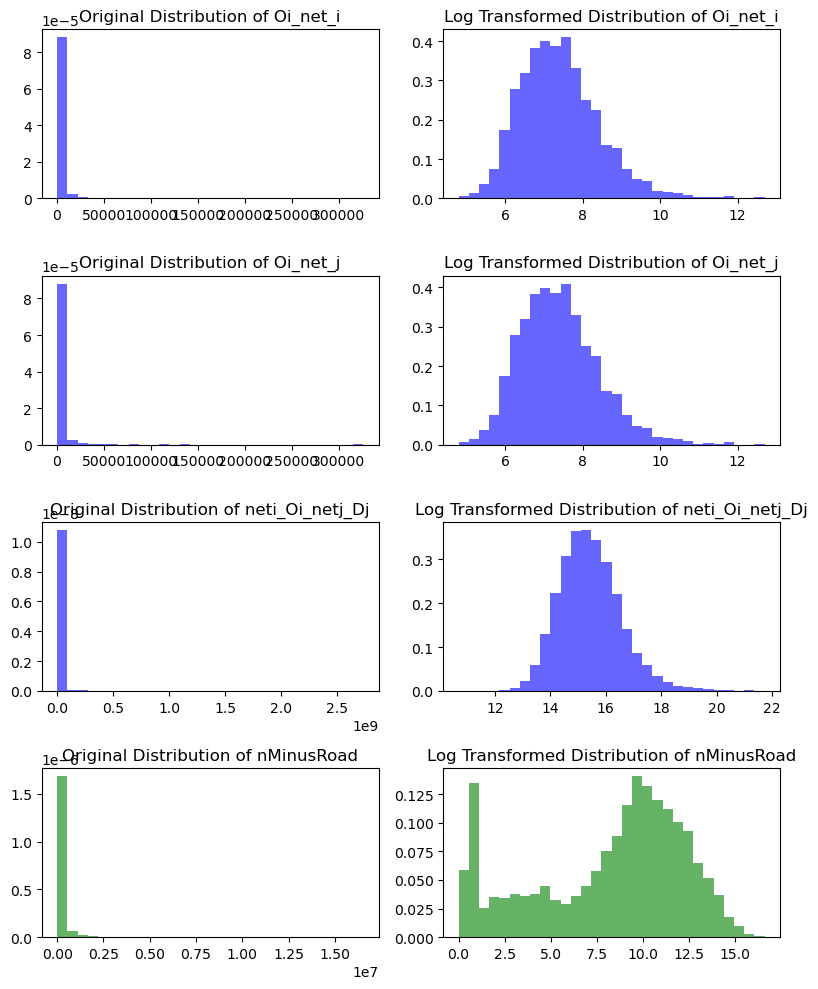

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer

# Apply logarithmic conversion to correct for positive skewness
dafni_impacts_enriched_df['Oi_net_i_log'] = np.log1p(dafni_impacts_enriched_df['Oi_net_i'])
dafni_impacts_enriched_df['Oi_net_j_log'] = np.log1p(dafni_impacts_enriched_df['Oi_net_j'])
dafni_impacts_enriched_df['neti_Oi_netj_Dj_log'] = np.log1p(dafni_impacts_enriched_df['neti_Oi_netj_Dj'])

#### correction for target
dafni_impacts_enriched_df['nMinusRoad'] += 1e-6
dafni_impacts_enriched_df['nMinusRoad_log1p'] = np.log1p(dafni_impacts_enriched_df['nMinusRoad'])


fig, axs = plt.subplots(4, 2, figsize=(8, 10)) 

# Oi_net_i 
axs[0, 0].hist(dafni_impacts_enriched_df['Oi_net_i'], bins=30, density=True, alpha=0.6, color='blue')
axs[0, 0].set_title('Original Distribution of Oi_net_i')
axs[0, 1].hist(dafni_impacts_enriched_df['Oi_net_i_log'], bins=30, density=True, alpha=0.6, color='blue')
axs[0, 1].set_title('Log Transformed Distribution of Oi_net_i')

# Oi_net_j 
axs[1, 0].hist(dafni_impacts_enriched_df['Oi_net_j'], bins=30, density=True, alpha=0.6, color='blue')
axs[1, 0].set_title('Original Distribution of Oi_net_j')
axs[1, 1].hist(dafni_impacts_enriched_df['Oi_net_j_log'], bins=30, density=True, alpha=0.6, color='blue')
axs[1, 1].set_title('Log Transformed Distribution of Oi_net_j')

# neti_Oi_netj_Dj
axs[2, 0].hist(dafni_impacts_enriched_df['neti_Oi_netj_Dj'], bins=30, density=True, alpha=0.6, color='blue')
axs[2, 0].set_title('Original Distribution of neti_Oi_netj_Dj')
axs[2, 1].hist(dafni_impacts_enriched_df['neti_Oi_netj_Dj_log'], bins=30, density=True, alpha=0.6, color='blue')
axs[2, 1].set_title('Log Transformed Distribution of neti_Oi_netj_Dj')

# nMinusRoad
axs[3, 0].hist(dafni_impacts_enriched_df['nMinusRoad'], bins=30, density=True, alpha=0.6, color='green')
axs[3, 0].set_title('Original Distribution of nMinusRoad')
axs[3, 1].hist(dafni_impacts_enriched_df['nMinusRoad_log1p'], bins=30, density=True, alpha=0.6, color='green')
axs[3, 1].set_title('Log Transformed Distribution of nMinusRoad')

plt.tight_layout()
plt.show()

In [7]:
# dafni_impacts_enriched_df.to_csv('dafni_impacts_enriched.csv', index=False)
dafni_impacts_enriched_df

,Unnamed: 0,idx,Ck1Road,Ck1Bus,Ck1Rail,Ck2Road,Ck2Bus,Ck2Rail,CkDiffRoad,CkDiffBus,...,osgb36_north_netj,area_netj,IsBus,IsRail,IsRoad,neti_Oi_netj_Dj,Oi_net_i_log,Oi_net_j_log,neti_Oi_netj_Dj_log,nMinusRoad_log1p
1244413,1244413,0,7.875351e+06,3.020828e+06,9.164254e+06,7.875358e+06,3.020827e+06,9.164249e+06,6.431428,-1.158351,...,181269.56,2897837.50,0,0,1,1.073018e+09,12.694269,12.694269,20.793741,5.075174e+00
1244414,1244414,1,7.875351e+06,3.020828e+06,9.164254e+06,7.875362e+06,3.020827e+06,9.164246e+06,10.342946,-1.817188,...,184481.22,485493.30,0,0,1,1.633128e+09,12.694269,6.962243,21.213763,6.970730e+00
1244415,1244415,2,7.875351e+06,3.020828e+06,9.164254e+06,7.875355e+06,3.020828e+06,9.164251e+06,3.970817,-0.692515,...,183918.50,664692.30,0,0,1,1.428501e+09,12.694269,8.974745,21.079892,6.456770e+00
1244416,1244416,3,7.875351e+06,3.020828e+06,9.164254e+06,7.875367e+06,3.020826e+06,9.164241e+06,15.551411,-2.470336,...,183201.61,1003221.00,0,0,1,1.234997e+09,12.694269,9.953325,20.934335,8.291797e+00
1244417,1244417,4,7.875351e+06,3.020828e+06,9.164254e+06,7.875364e+06,3.020826e+06,9.164244e+06,12.469740,-1.986064,...,183328.97,968218.20,0,0,1,1.156357e+09,12.694269,8.795279,20.868540,9.413689e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976471,1976471,49995,7.875351e+06,3.020828e+06,9.164254e+06,7.875352e+06,3.020828e+06,9.164254e+06,0.480146,-0.161877,...,805213.90,552673.56,0,0,1,6.148712e+05,5.236442,7.131699,13.329170,1.609438e+00
1976472,1976472,49996,7.875351e+06,3.020828e+06,9.164254e+06,7.875351e+06,3.020829e+06,9.164254e+06,-0.351458,0.112101,...,805269.06,921425.60,0,0,1,6.767582e+05,5.236442,6.308098,13.425071,1.609438e+00
1976473,1976473,49997,7.875351e+06,3.020828e+06,9.164254e+06,7.875351e+06,3.020829e+06,9.164255e+06,-0.713950,0.240698,...,805897.00,1592199.90,0,0,1,6.447332e+05,5.236442,9.675457,13.376593,9.999995e-07
1976474,1976474,49998,7.875351e+06,3.020828e+06,9.164254e+06,7.875352e+06,3.020828e+06,9.164254e+06,0.996852,-0.338894,...,805902.40,1170180.10,0,0,1,3.567022e+05,5.236442,8.488588,12.784659,1.945910e+00


In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Select feature columns for PCA
# pca_features = ['Oi_net_i_log', 'Dj_net_j','neti_Oi_netj_Dj_log','net_secs','lat_neti','lon_neti','lat_netj','lon_netj']
# pca_features = ['Oi_net_i_log', 'Dj_net_j','neti_Oi_netj_Dj_log','net_secs']
pca_features = ['Oi_net_i_log', 'Dj_net_j','neti_Oi_netj_Dj_log','net_secs','osgb36_east_netj','osgb36_north_netj', 'osgb36_east_neti','osgb36_north_neti']

rows_before = dafni_impacts_enriched_df.shape[0]
dafni_impacts_enriched_df = dafni_impacts_enriched_df.dropna(subset=pca_features)
rows_after = dafni_impacts_enriched_df.shape[0]
rows_deleted = rows_before - rows_after
print(f"Deleted {rows_deleted} rows due to missing values.")


# standardized
scaler = StandardScaler()
features_scaled = scaler.fit_transform(dafni_impacts_enriched_df[pca_features])

# # Initialise the PCA 
# Explained variance ratio: [3.15486080e-01 1.92757061e-01 1.79219418e-01 1.50050956e-01
#  1.14921627e-01 4.67462891e-02 8.18569706e-04 2.78600440e-32]

pca = PCA(n_components=5) 

# fitting PCA
pca_result = pca.fit_transform(features_scaled)
pca_df = pd.DataFrame(data=pca_result)

# Explained variance ratios
print("Explained variance ratio:", pca.explained_variance_ratio_)

Deleted 0 rows due to missing values.
Explained variance ratio: [0.39796963 0.2474763  0.13427075 0.12261    0.09693728]


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# target
target = dafni_impacts_enriched_df['nMinusRoad_log1p'].values

# # Calculate the weights, using the reciprocal of the frequency as the weights
# value_counts = dafni_impacts_enriched_df['nMinusRoad_log1p'].value_counts(normalize=True)
# weights = 1.0 / (value_counts * len(dafni_impacts_enriched_df))
# weights /= weights.mean()
# dafni_impacts_enriched_df['sample_weight'] = dafni_impacts_enriched_df['nMinusRoad_log1p'].map(weights)


# # option 1:Using PCA features as input features
# features_pca = pca_df.values  
# X_train, X_test, y_train, y_test = train_test_split(features_pca, target, test_size=0.2, random_state=42)


# option2: use skewed and non-PCA features
# features = dafni_impacts_enriched_df[pca_features]
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# # option 3:Using PCA features as input features with weight
# features_pca = pca_df.values  
# target = dafni_impacts_enriched_df['nMinusRoad_log1p'].values
# sample_weight = dafni_impacts_enriched_df['sample_weight'].values


# X_train, X_test, y_train, y_test, train_weights, test_weights = train_test_split(
#     features_pca, target, sample_weight, test_size=0.2, random_state=42)

# option 4:using train/test index
# Split DataFrame and keep the indices
train_df, test_df = train_test_split(dafni_impacts_enriched_df[pca_features + ['nMinusRoad_log1p']], test_size=0.2, random_state=42)

# Extract features, target, and weights with indices preserved
X_train = train_df[pca_features].values
y_train = train_df['nMinusRoad_log1p'].values
# train_weights = train_df['sample_weight'].values
X_test = test_df[pca_features].values
y_test = test_df['nMinusRoad_log1p'].values
# test_weights = test_df['sample_weight'].values
test_indices = test_df.index 



# Data standardisation - Z-score standardisation
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


# from sklearn.preprocessing import MinMaxScaler
# # Data normalisation - scaling data to between 0 and 1
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)



In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import mixed_precision

def createNetwork(num_inputs, neurons_per_layer, activations, kernel_initializers, dropout_rates):
    model = Sequential()
    model.add(Dense(neurons_per_layer[0], input_dim=num_inputs, activation=activations[0], kernel_initializer=kernel_initializers[0]))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rates[0]))
    for i in range(1, len(neurons_per_layer)):
        model.add(Dense(neurons_per_layer[i], activation=activations[i], kernel_initializer=kernel_initializers[i]))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rates[i]))
    model.add(Dense(1, activation='linear')) 
    optimizer = Adam(learning_rate=0.001)  
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])
    return model



In [11]:
import datetime
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Append Experiment Results with Additional Model Configurations
def append_experiment_results(model_config, performance, file_path='TrainingLog/model_performance_summary_Geometry.csv'):
    if not os.path.isfile(file_path):
        df = pd.DataFrame(columns=list(model_config.keys()) + list(performance.keys()))
        df.to_csv(file_path, index=False)
    else:
        results_df = pd.DataFrame([{**model_config, **performance}])
        results_df.to_csv(file_path, mode='a', header=False, index=False)
    print(f'Results appended to {file_path}')

# Train Model Function
def trainModel(model, X_train, y_train, X_test, y_test, epochs, batchSize, val_split, model_config):
    timestamp = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
    training_log_filename = f'TrainingLog/training_log_{timestamp}.csv'
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True),
        ModelCheckpoint('model_best.h5', monitor='val_loss', save_best_only=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1),
        CSVLogger(training_log_filename)
    ]
    
    history = model.fit(
        X_train, y_train, 
        # sample_weight=sample_weight,
        epochs=epochs, 
        batch_size=batchSize, 
        validation_split=val_split, 
        verbose=1, 
        callbacks=callbacks
    )
    
    y_pred = model.predict(X_test)
    
    y_pred_inv_log = np.expm1(y_pred.flatten())
    y_test_inv_log = np.expm1(y_test) 

    mse_original = mean_squared_error(y_test_inv_log, y_pred_inv_log)
    mae_original = mean_absolute_error(y_test_inv_log, y_pred_inv_log)

    performance = {'mse': mean_squared_error(y_test, y_pred), 
                   'mae': mean_absolute_error(y_test, y_pred), 
                   'r2': r2_score(y_test, y_pred),
                   'mse_original_scale': mse_original,
                   'mae_original_scale': mae_original}

    append_experiment_results(model_config, performance)
    return history, performance

In [12]:
# Customizable model parameters
neurons_per_layer = [256, 256, 256, 256]  
activations = ['sigmoid', 'sigmoid', 'sigmoid','sigmoid']  
kernel_initializers = ['glorot_uniform', 'glorot_uniform', 'glorot_uniform', 'glorot_uniform']  
dropout_rates = [0.1, 0.1, 0.1,0.1]  
model_params = {'epochs': 500, 'batchSize': 256} 
model_config = {
    'model_layers': len(neurons_per_layer),
    'neurons_per_layer': neurons_per_layer,
    'activations': activations,
    'kernel_initializers': kernel_initializers,
    'dropout_rates': dropout_rates,
    'optimizer': 'adam'
}

In [13]:
model = createNetwork(
    num_inputs=X_train.shape[1],
    neurons_per_layer=neurons_per_layer,
    activations=activations,
    kernel_initializers=kernel_initializers,
    dropout_rates=dropout_rates
)

# Now pass in the sample_weight of the training set when calling trainModel
history, performance = trainModel(
    model=model,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    epochs=model_params['epochs'],
    batchSize=model_params['batchSize'],
    val_split=0.2,
    model_config=model_config
    # sample_weight=train_weights  
)

Epoch 1/500
1497/1500 [============================>.] - ETA: 0s - loss: 20.3727 - mae: 3.6923 - mse: 20.3727
Epoch 1: val_loss improved from inf to 15.60203, saving model to model_best.h5
1500/1500 [==============================] - 10s 6ms/step - loss: 20.3648 - mae: 3.6917 - mse: 20.3648 - val_loss: 15.6020 - val_mae: 3.2664 - val_mse: 15.6020 - lr: 0.0010
Epoch 2/500
1496/1500 [============================>.] - ETA: 0s - loss: 16.0849 - mae: 3.3425 - mse: 16.0849
Epoch 2: val_loss improved from 15.60203 to 15.49886, saving model to model_best.h5
1500/1500 [==============================] - 10s 7ms/step - loss: 16.0861 - mae: 3.3428 - mse: 16.0861 - val_loss: 15.4989 - val_mae: 3.3067 - val_mse: 15.4989 - lr: 0.0010
Epoch 3/500
1499/1500 [============================>.] - ETA: 0s - loss: 15.8332 - mae: 3.3176 - mse: 15.8332
Epoch 3: val_loss improved from 15.49886 to 15.45885, saving model to model_best.h5
1500/1500 [==============================] - 10s 6ms/step - loss: 15.8330 - m

In [14]:
# Train the model
# model = createNetwork(num_inputs=X_train.shape[1], neurons_per_layer=neurons_per_layer, activations=activations, kernel_initializers=kernel_initializers, dropout_rates=dropout_rates)
# history, performance = trainModel(model, X_train, y_train, X_test, y_test, model_params['epochs'], model_params['batchSize'], 0.2, model_config)

3750/3750 [==============================] - 5s 1ms/step
Mean Squared Error (MSE) on test data: 13.46260800116175
Mean Absolute Error (MAE) on test data: 2.99776153490814
R-squared Score (R2) on test data: 0.18752277468716905
Mean Squared Error (MSE) on original data scale: 349551542495.3087
Mean Absolute Error (MAE) on original data scale: 156620.72138106907


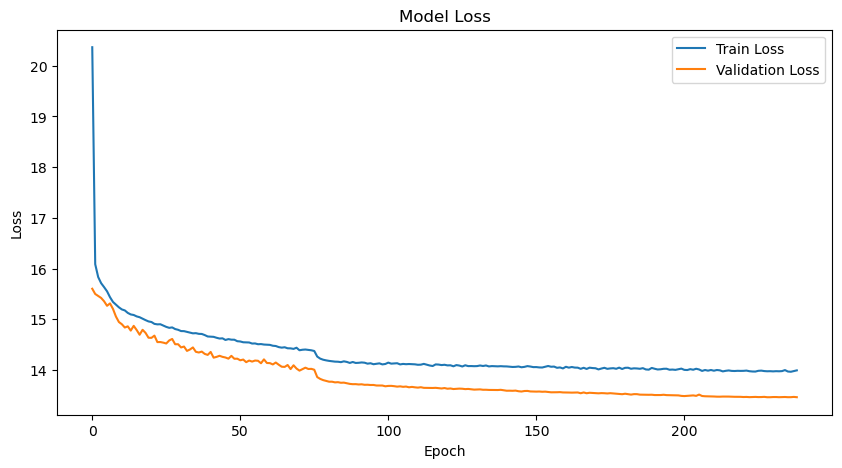

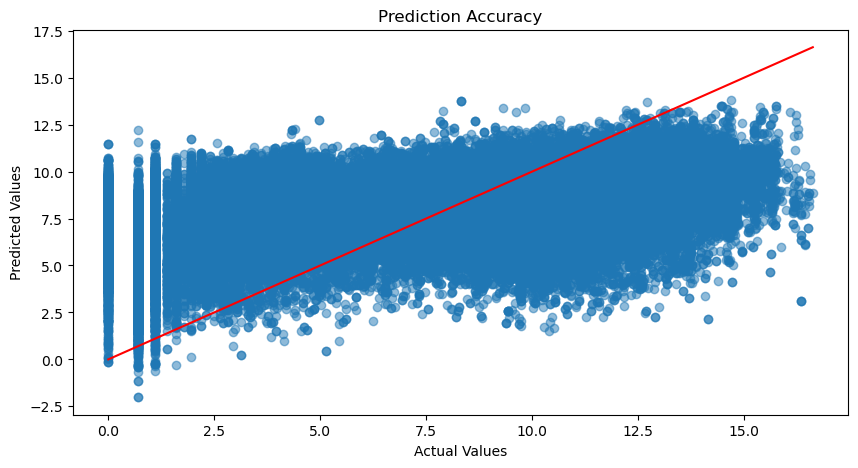

In [15]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

# Calculated indicators
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE) on test data: {mse}')
print(f'Mean Absolute Error (MAE) on test data: {mae}')
print(f'R-squared Score (R2) on test data: {r2}')

# Inverse log-transformed predicted values
y_pred_inv_log = np.expm1(y_pred.flatten())
y_test_inv_log = np.expm1(y_test)

# Calculate MAE and MSE on the original scale
mse_original = mean_squared_error(y_test_inv_log, y_pred_inv_log)
mae_original = mean_absolute_error(y_test_inv_log, y_pred_inv_log)


print(f'Mean Squared Error (MSE) on original data scale: {mse_original}')
print(f'Mean Absolute Error (MAE) on original data scale: {mae_original}')

# Plot Training & Validation Loss Values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plotting Predicted Versus Actual Values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Prediction Accuracy')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect prediction diagonal
plt.show()


In [16]:
# After predicting
y_pred_inv_log = np.expm1(y_pred.flatten())

# Assigning back to the DataFrame using the preserved indices
dafni_impacts_enriched_df.loc[test_indices, 'Predicted_nMinusRoad'] = y_pred_inv_log

# Save the complete DataFrame to CSV
dafni_impacts_enriched_df.to_csv('Complete_Stage1_Road.csv', index=False)
